In [368]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from scipy import ndimage

img1 = cv2.imread("Q3_1.jpg").astype(np.float64)
img2 = cv2.imread("Q3_2.jpg").astype(np.float64)
print(img1.shape)
print(img2.shape)


(1280, 960, 3)
(1280, 960, 3)


# part1

In [2]:
def derivativeI(I):
  #-Derivative x
  Kx = -1*np.array([[-1,0,1]])
  Ix = ndimage.convolve(I, Kx)
  #-Derivative y
  Ky = -1*np.array([[-1],[0],[1]])
  Iy = ndimage.convolve(I, Ky)
  #-Gradient
  #magnitude = np.sqrt(Fx**2 + Fy**2)
  return abs(Ix),abs(Iy)

def derivativeRGB(img):
  Ix = np.zeros(img.shape)
  Iy = np.zeros(img.shape)
  for i in range(3):
    Ix[:,:,i], Iy[:,:,i] = derivativeI(img[:,:,i])

  dIx = np.maximum(Ix[:,:,0],Ix[:,:,1])
  dIx = np.maximum(dIx,Ix[:,:,2])

  dIy = np.maximum(Iy[:,:,0],Iy[:,:,1])
  dIy = np.maximum(dIy,Iy[:,:,2])

  return dIx, dIy


Text(0.5, 1.0, 'Vertical derivative of img2')

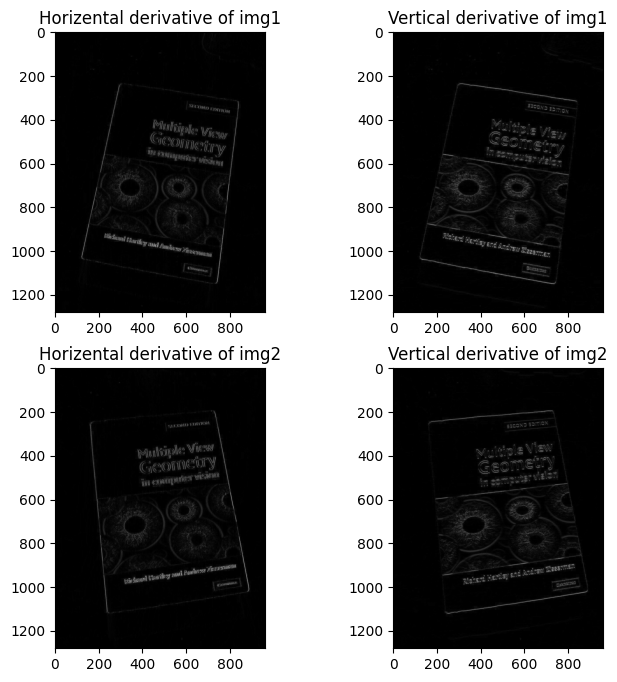

In [3]:
dIx1, dIy1 = derivativeRGB(img1)
dIx2, dIy2 = derivativeRGB(img2)

fig = plt.figure(figsize=(8, 8))
fig.add_subplot(2,2,1)
plt.imshow(dIx1, cmap='gray')
plt.title('Horizental derivative of img1')

fig.add_subplot(2,2,2)
plt.imshow(dIy1, cmap='gray')
plt.title('Vertical derivative of img1')

fig.add_subplot(2,2,3)
plt.imshow(dIx2, cmap='gray')
plt.title('Horizental derivative of img2')

fig.add_subplot(2,2,4)
plt.imshow(dIy2, cmap='gray')
plt.title('Vertical derivative of img2')

# part2

In [4]:
Ixx1 = dIx1*dIx1
Iyy1 = dIy1*dIy1
Ixy1 = dIy1*dIx1

Ixx2 = dIx2*dIx2
Iyy2 = dIy2*dIy2
Ixy2 = dIy2*dIx2

# part3

In [5]:
from scipy.ndimage import gaussian_filter
sigma = 5
w = 5
Sxx1 = cv2.GaussianBlur(Ixx1,(w,w),sigmaX = sigma)
Syy1 = cv2.GaussianBlur(Iyy1,(w,w),sigmaX = sigma)
Sxy1 = cv2.GaussianBlur(Ixy1,(w,w),sigmaX = sigma)

Sxx2 = cv2.GaussianBlur(Ixx2,(w,w),sigmaX = sigma)
Syy2 = cv2.GaussianBlur(Iyy2,(w,w),sigmaX = sigma)
Sxy2 = cv2.GaussianBlur(Ixy2,(w,w),sigmaX = sigma)

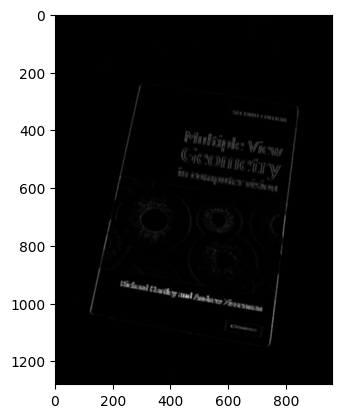

In [6]:
plt.imshow(Sxx1,cmap='gray')

In [161]:
R1 = np.zeros((img1.shape[0], img1.shape[1]))
R2 = np.zeros((img2.shape[0], img2.shape[1]))
k=0.1
for u in range(img1.shape[0]):
  for v in range(img1.shape[1]):
    det1 = Sxx1[u,v]*Syy1[u,v]-Sxy1[u,v]*Sxy1[u,v]
    det2 = Sxx2[u,v]*Syy2[u,v]-Sxy2[u,v]*Sxy2[u,v]
    tr1 = Sxx1[u,v]+Syy1[u,v]
    tr2 = Sxx2[u,v]+Syy2[u,v]

    R1[u,v] = det1-k*tr1**2
    R2[u,v] = det2-k*tr2**2


# part4

In [179]:
R1_norm = (R1-np.min(R1))/(np.max(R1)-np.min(R1))
R2_norm = (R2-np.min(R2))/(np.max(R2)-np.min(R2))

Text(0.5, 1.0, 'Hariss Matrix of image2')

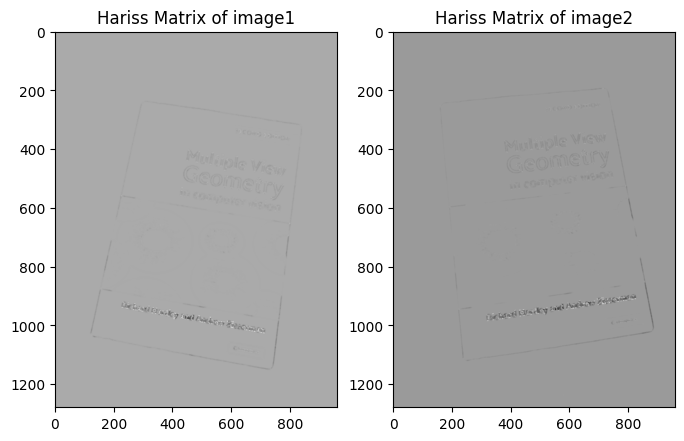

In [163]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(R1_norm, cmap='gray')
plt.title('Hariss Matrix of image1')

fig.add_subplot(1,2,2)
plt.imshow(R2_norm, cmap='gray')
plt.title('Hariss Matrix of image2')

In [118]:
cv2.imwrite("res04_score.jpg",R1_norm*255)
cv2.imwrite("res05_score.jpg",R2_norm*255)

True

In [164]:
R1_norm

array([[0.66430159, 0.66430159, 0.66430159, ..., 0.66430158, 0.66430153,
        0.66430149],
       [0.66430159, 0.66430159, 0.66430159, ..., 0.66430158, 0.66430153,
        0.66430149],
       [0.66430159, 0.66430159, 0.66430159, ..., 0.66430157, 0.66430154,
        0.66430152],
       ...,
       [0.66430159, 0.66430159, 0.66430159, ..., 0.66430159, 0.66430159,
        0.66430159],
       [0.66430159, 0.66430159, 0.66430159, ..., 0.66430159, 0.66430159,
        0.66430159],
       [0.66430159, 0.66430159, 0.66430159, ..., 0.66430159, 0.66430159,
        0.66430159]])

In [165]:
R2_norm

array([[0.60485632, 0.60485632, 0.60485632, ..., 0.60485631, 0.60485632,
        0.60485632],
       [0.60485632, 0.60485632, 0.60485632, ..., 0.60485631, 0.60485632,
        0.60485632],
       [0.60485632, 0.60485632, 0.60485632, ..., 0.60485631, 0.60485632,
        0.60485632],
       ...,
       [0.60485632, 0.60485632, 0.60485632, ..., 0.60485633, 0.60485633,
        0.60485632],
       [0.60485632, 0.60485632, 0.60485632, ..., 0.60485632, 0.60485632,
        0.60485632],
       [0.60485632, 0.60485632, 0.60485632, ..., 0.60485631, 0.60485632,
        0.60485632]])

In [423]:
#0.7
thre1 = 0.70
R1t = R1_norm.copy()
R1t[R1t<thre1] = 0
#0.65
thre2 = 0.65
R2t = R2_norm.copy()
R2t[R2t<thre2] = 0

Text(0.5, 1.0, 'Hariss Matrix of image2')

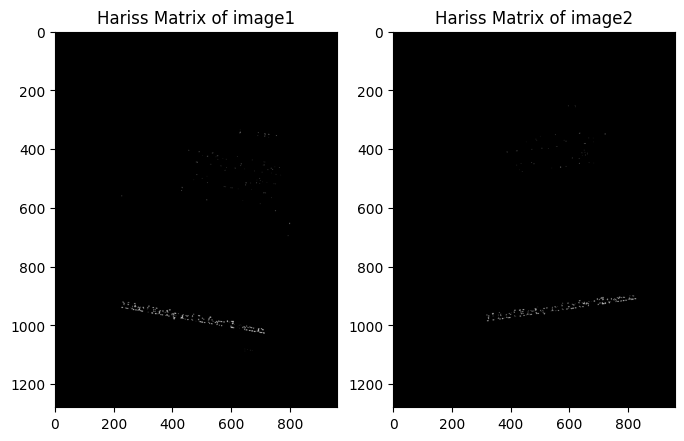

In [424]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(R1t, cmap='gray')
plt.title('Hariss Matrix of image1')

fig.add_subplot(1,2,2)
plt.imshow(R2t, cmap='gray')
plt.title('Hariss Matrix of image2')

# NMS

In [425]:
R1n = R1t.copy()
R2n = R2t.copy()

In [426]:
w = 20
locs1 = []
for i in range(0, R1n.shape[0], w):
  for j in range(0, R1n.shape[1], w):
    box = R1n[i:i+w, j:j+w]
    max = np.max(box)
    loc_max = np.where(box==max)
    if max!=0:
      R1n[i:i+w, j:j+w] = np.zeros_like(box)
      R1n[loc_max[0]+i, loc_max[1]+j]=max
      locs1.append([int(loc_max[0]+i), int(loc_max[1]+j)])
    else:
      R1n[i:i+w, j:j+w] = np.zeros_like(box)

In [427]:
w = 20
locs2 = []
for i in range(0, R2n.shape[0], w):
  for j in range(0, R2n.shape[1], w):
    box = R2n[i:i+w, j:j+w]
    max = np.max(box)
    loc_max = np.where(box==max)
    if max!=0:
      R2n[i:i+w, j:j+w] = np.zeros_like(box)
      R2n[loc_max[0]+i, loc_max[1]+j]=max
      locs2.append([int(loc_max[0]+i), int(loc_max[1]+j)])
    else:
      R2n[i:i+w, j:j+w] = np.zeros_like(box)

Text(0.5, 1.0, 'NMS Matrix of image2')

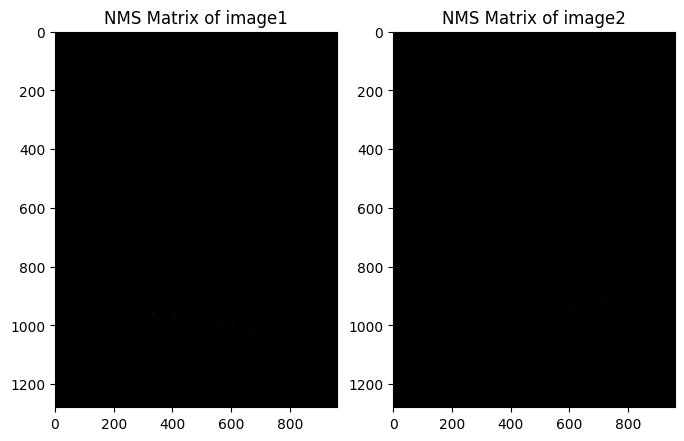

In [428]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(R1n, cmap='gray')
plt.title('NMS Matrix of image1')

fig.add_subplot(1,2,2)
plt.imshow(R2n, cmap='gray')
plt.title('NMS Matrix of image2')

In [429]:
cv2.imwrite("res06_score.jpg",R1n*255)
cv2.imwrite("res07_score.jpg",R2n*255)

True

In [430]:
print("Num of Points for img1: "+str(len(locs1)))
print("Num of Points for img2: "+str(len(locs2)))


Num of Points for img1: 115
Num of Points for img2: 86


# Points on image1

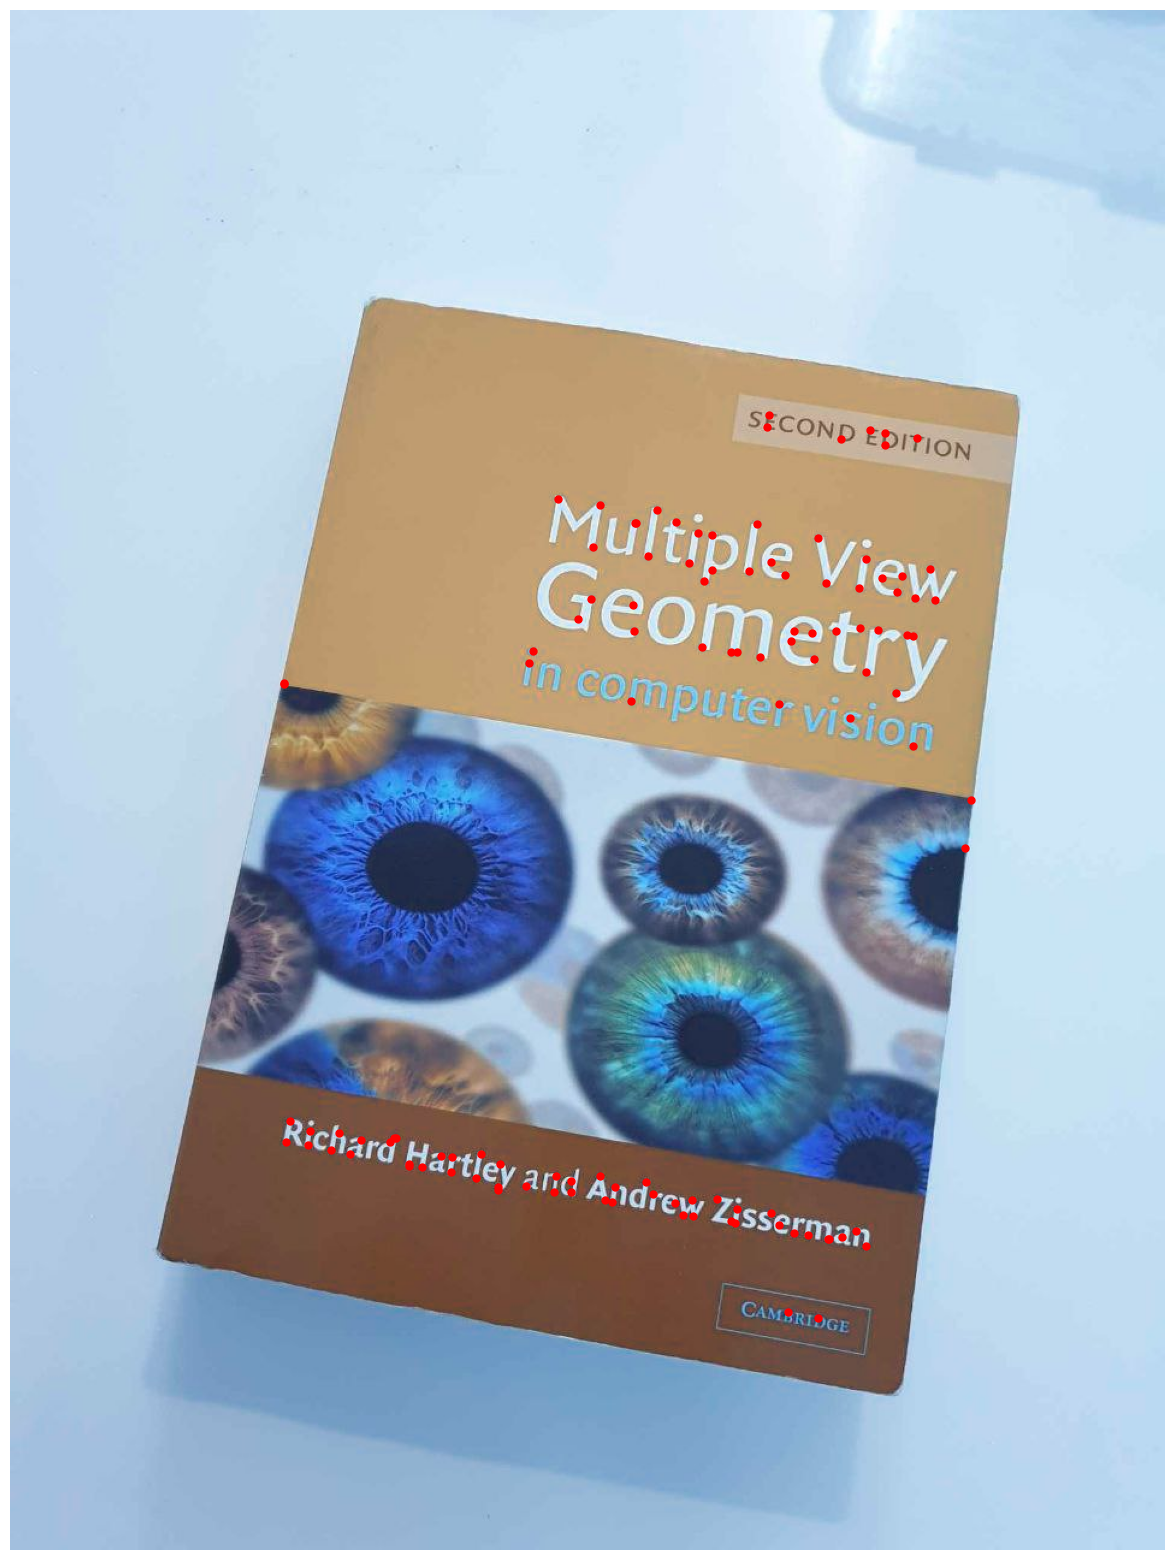

In [431]:
plt.figure(figsize=(20,20))
plt.imshow(img1.astype(np.uint8))
for l in locs1:
  plt.plot(l[1], l[0], 'ro', markersize=5)
  plt.axis("off")

# points on image2

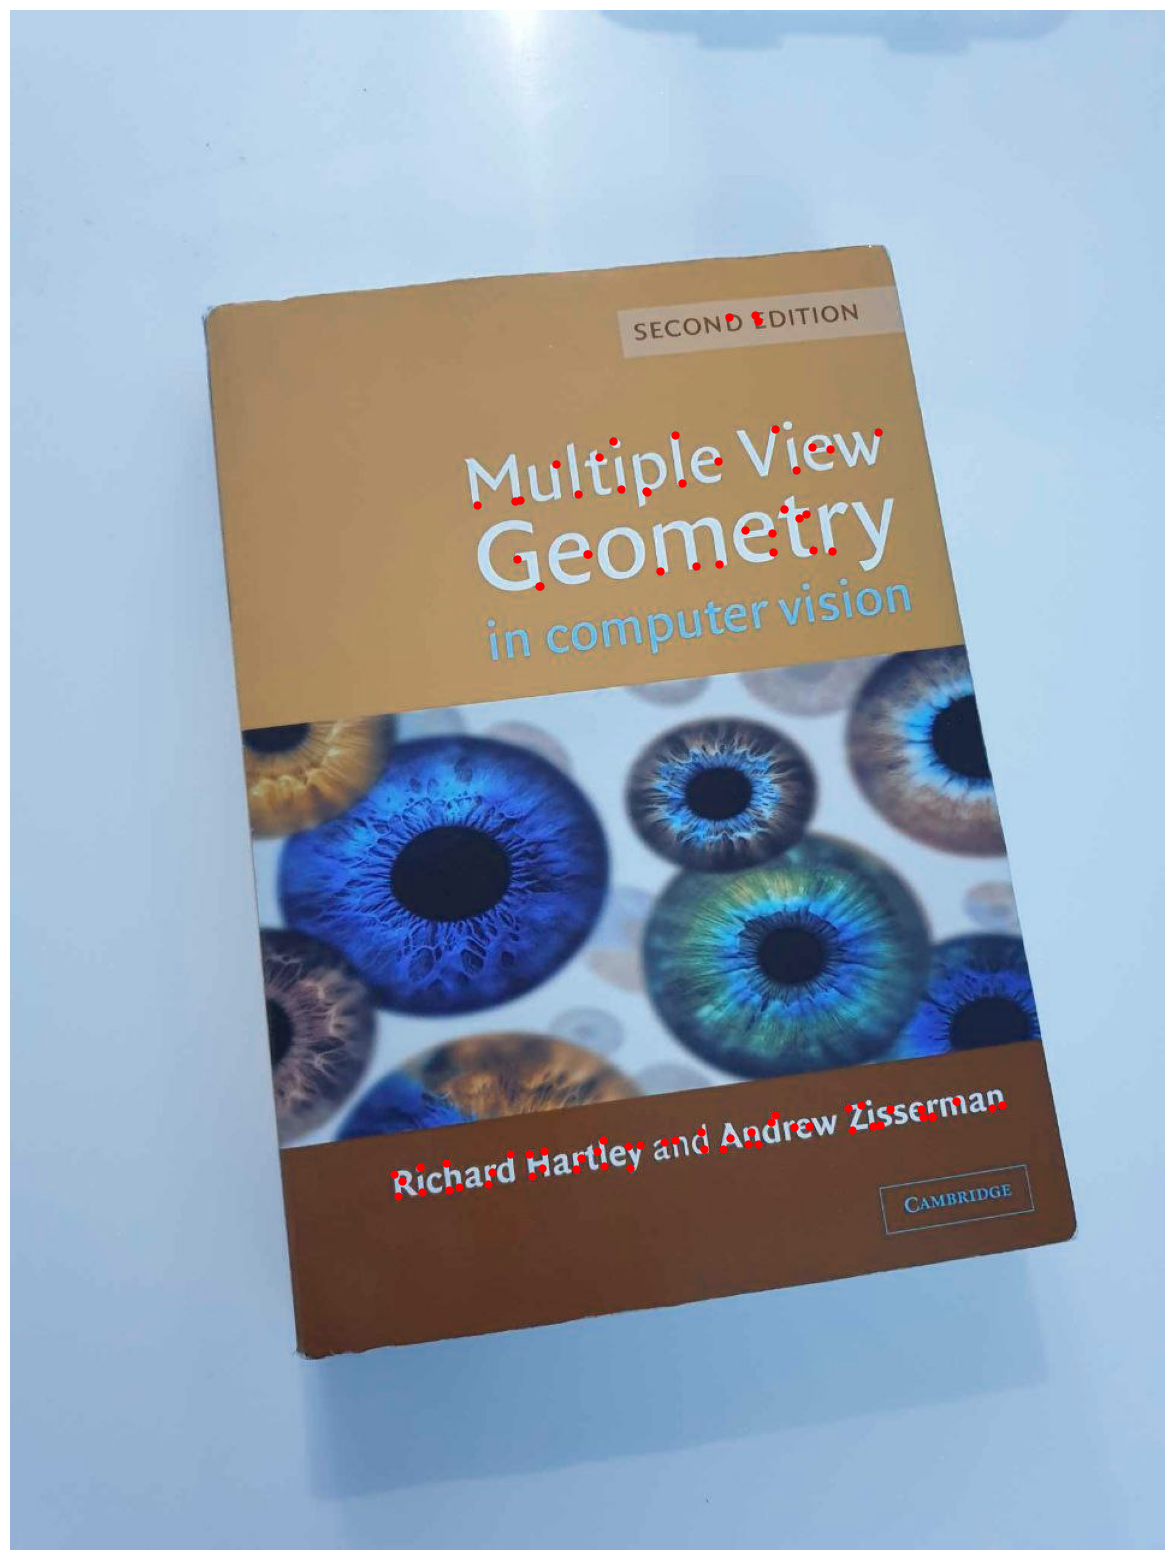

In [432]:
plt.figure(figsize=(20,20))
plt.imshow(img2.astype(np.uint8))
for l in locs2:
  plt.plot(l[1], l[0], 'ro', markersize=5)
  plt.axis("off")

# feature vector

In [433]:
img1_g = cv2.imread("Q3_1.jpg",0).astype(np.float64)
img2_g = cv2.imread("Q3_2.jpg",0).astype(np.float64)
print(img1_g.shape)
print(img2_g.shape)

(1280, 960)
(1280, 960)


In [434]:
N = 20
fv1 = np.zeros((len(locs1), (2*N+1)**2))
fv2 = np.zeros((len(locs2), (2*N+1)**2))

for l in range(len(locs1)):
  x0 = locs1[l][0]
  y0 = locs1[l][0]
  n=0
  for i in range(-N,N+1,1):
    for j in range(-N,N+1,1):
      if x0+i>-1 and x0+i<img1_g.shape[0] and y0+j>-1 and y0+j<img1_g.shape[1]:
        fv1[l][n] = img1_g[x0+i,y0+j]
      else:
        fv1[l][n] = None
      n+=1

for l in range(len(locs2)):
  x0 = locs2[l][0]
  y0 = locs2[l][0]
  n=0
  for i in range(-N,N+1,1):
    for j in range(-N,N+1,1):
      if x0+i>-1 and x0+i<img2_g.shape[0] and y0+j>-1 and y0+j<img2_g.shape[1]:
        fv2[l][n] = img2_g[x0+i,y0+j]
      else:
        fv2[l][n] = None
      n+=1

In [435]:
print(fv1[0])
print(fv2[0])
print(np.sqrt(np.sum((fv1[0] - fv2[0])**2)))

[145. 145. 145. ... 147. 147. 147.]
[219. 218. 216. ... 128. 129. 130.]
893.9082726991624


# compare feature vectors of two images

In [439]:
thre = 1.5
reg1 = np.zeros(len(locs1))
for l in range(len(locs1)):
  dist = np.zeros(len(locs2))
  for d in range(len(locs2)):
    dist[d] = np.sqrt(np.sum((fv1[l] - fv2[d])**2))
  index = np.argsort(dist)
  p1 = index[0]
  p2 = index[1]
  d1 = dist[p1]
  d2 = dist[p2]
  if d1/d2<thre:
    reg1[l] = p1
  else:
    reg1[l] = None

reg2 = np.zeros(len(locs2))
for l in range(len(locs2)):
  dist = np.zeros(len(locs1))
  for d in range(len(locs1)):
    dist[d] = np.sqrt(np.sum((fv2[l] - fv1[d])**2))
  index = np.argsort(dist)
  p1 = index[0]
  p2 = index[1]
  d1 = dist[p1]
  d2 = dist[p2]
  if d1/d2<thre:
    reg2[l] = p1
  else:
    reg2[l] = None

In [440]:
print(reg1)
print(reg2)

[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4. 16.
 21. 30. 22. 22. 16. 27. 23. 32. 21. 33. 33. 27. 47. 31. 16. 25. 47. 30.
 36. 19. 19. 19. 19. 34. 19. 33.  4. 16.  4.  4.  4. 32. 25. 33. 25.  1.
 11. 25. 23.  4. 23. 33. 21. 24.  4. 43. 43. 43. 43. 43. 43. nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9. 12. 59. 15. 17. 15.
 15. 59. 59. 54. 54.  8. 12.  8. 61. 61. 61. 31. 61. 31.  8.  8. 41. 36.
 36. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66.
 66. 66. 66. 66. 66. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


In [441]:
good_reg = []
for l in range(len(locs2)):
  p = reg2[l]
  if not np.isnan(p):
    if reg1[int(p)]==l:
      good_reg.append([l,p])

In [442]:
print(good_reg)

[[4, 0.0], [16, 17.0], [31, 31.0], [34, 41.0], [36, 36.0], [43, 66.0]]


# res08_corres.jpg

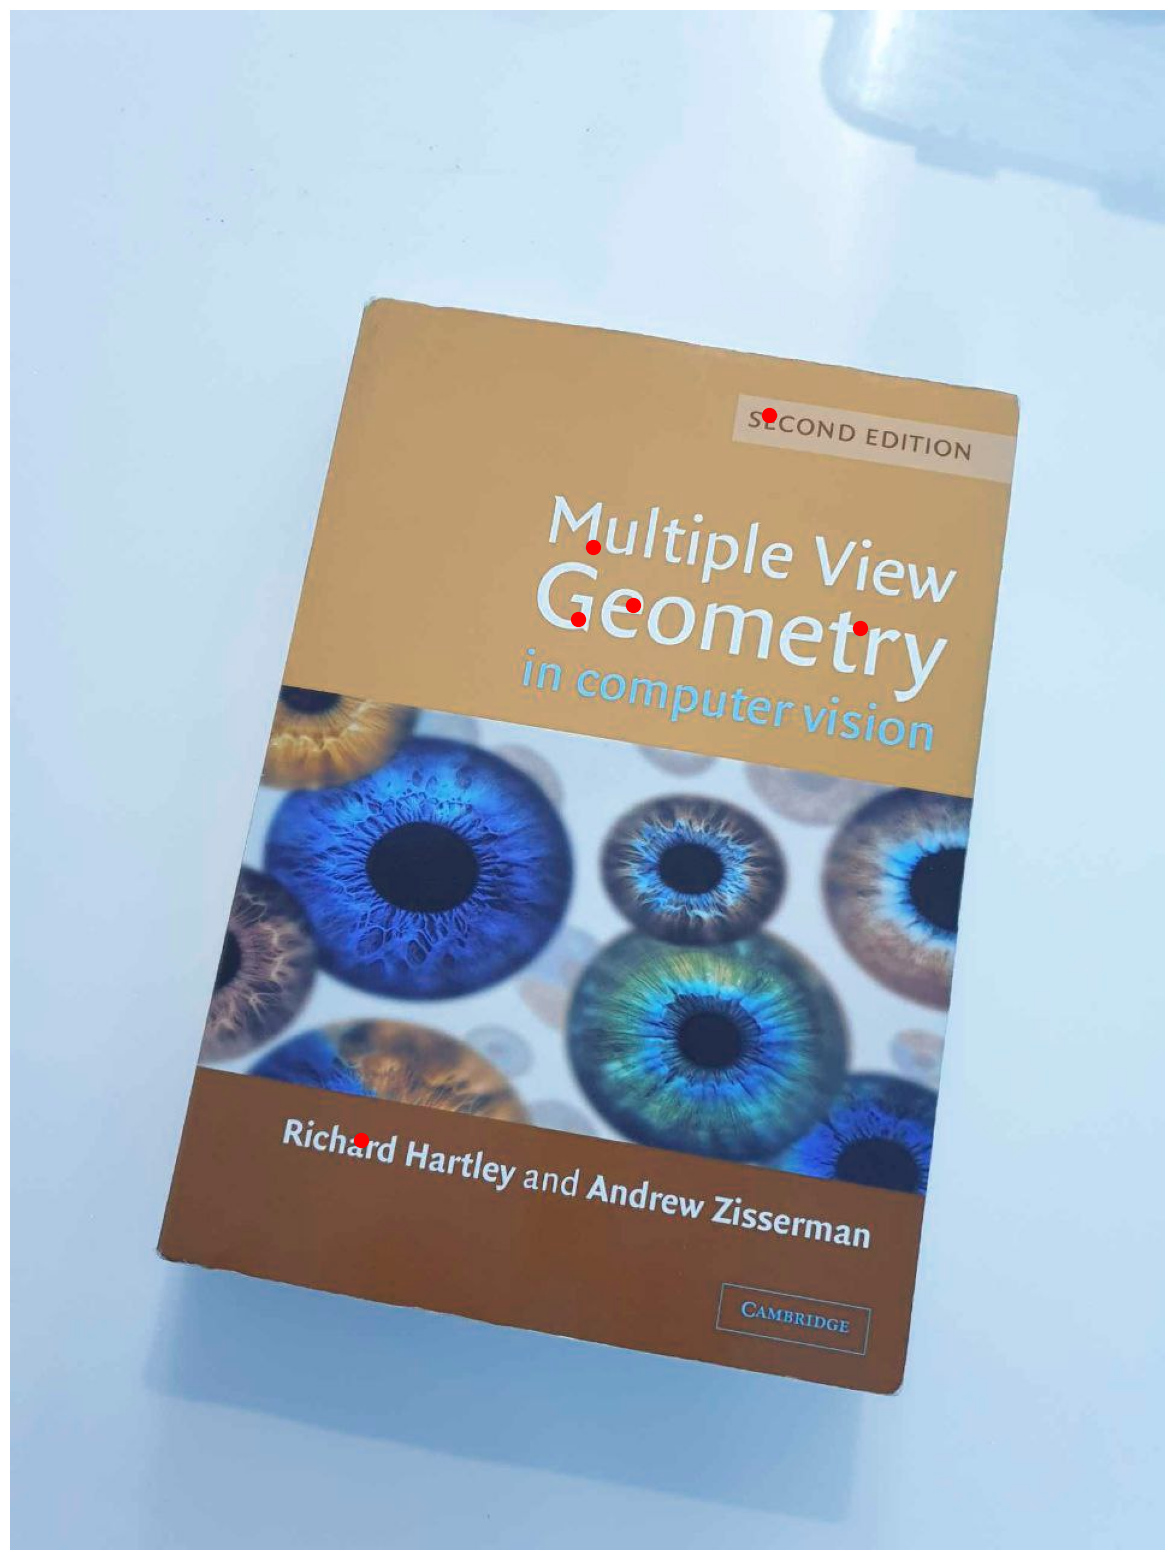

In [443]:
plt.figure(figsize=(20,20))
plt.imshow(img1.astype(np.uint8))
for reg in good_reg:
  l = locs1[int(reg[1])]
  plt.plot(l[1], l[0], 'ro', markersize=10)
  plt.axis("off")


# res09_corres.jpg

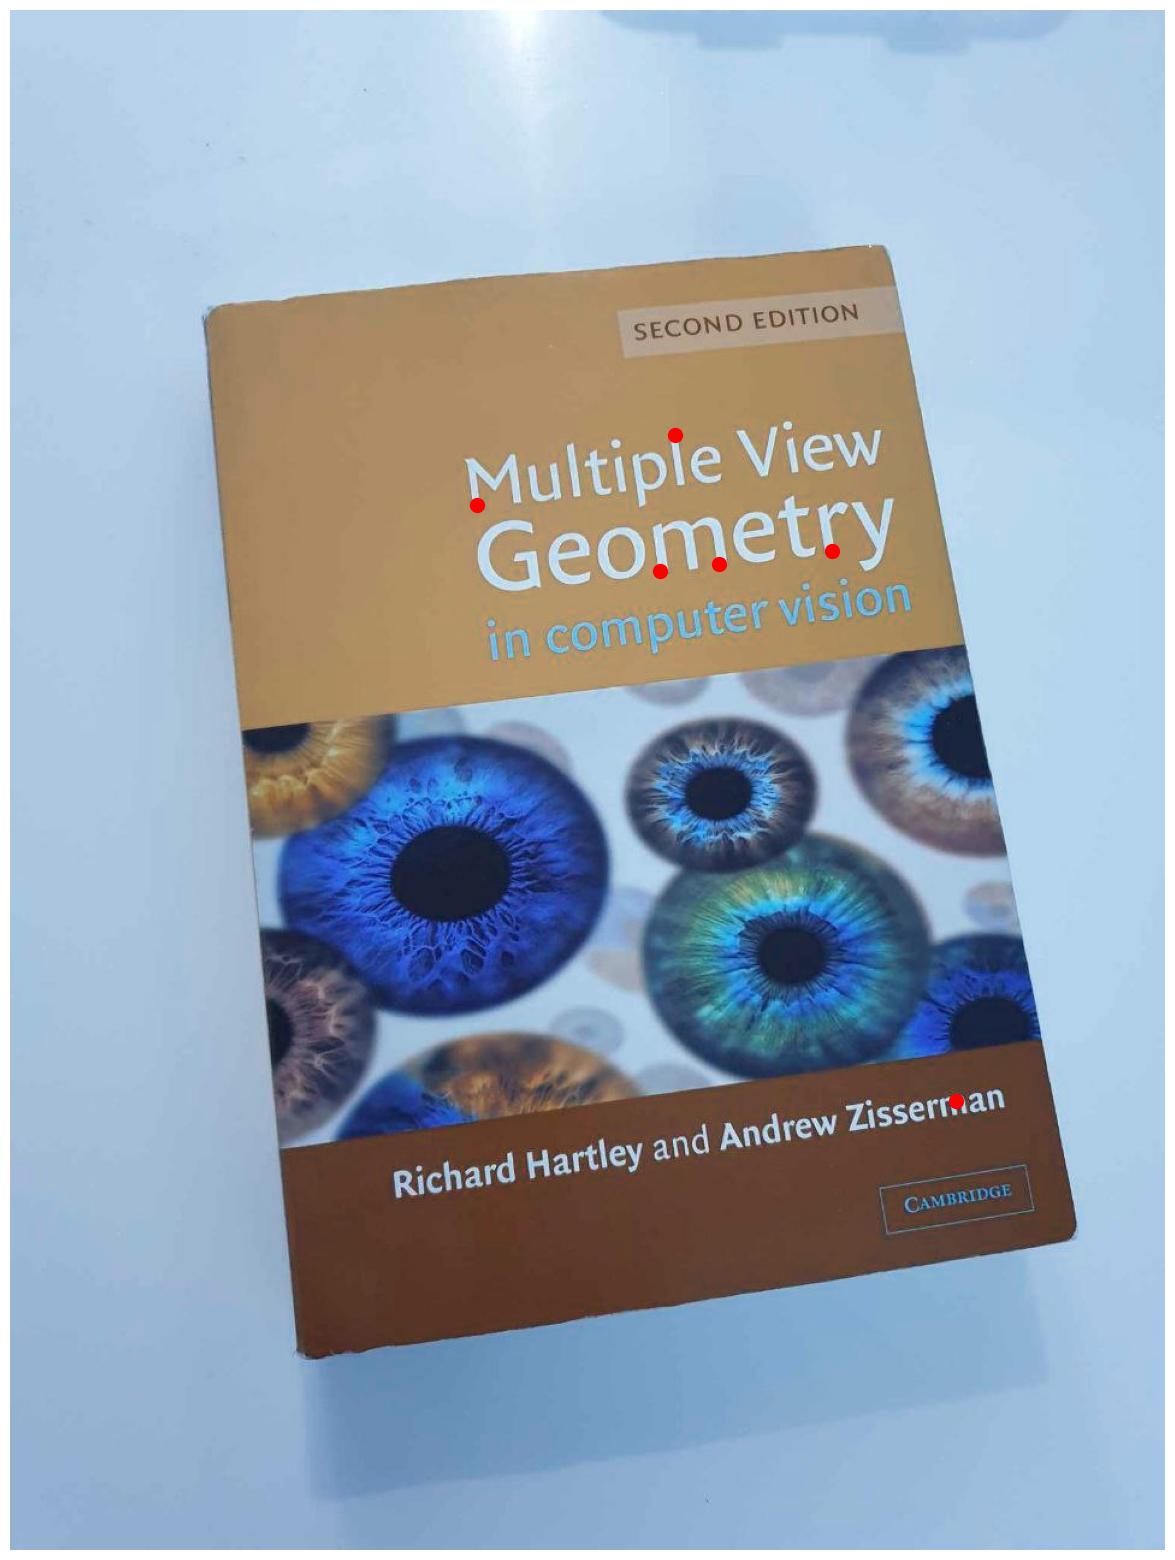

In [444]:
plt.figure(figsize=(20,20))
plt.imshow(img2.astype(np.uint8))
for reg in good_reg:
  l = locs2[int(reg[0])]
  plt.plot(l[1], l[0], 'ro', markersize=10)
  plt.axis("off")

# match correspondence points

<ipython-input-445-dd7486b986d9>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(xy1[0], xy1[1], 'ro', color=color, markersize=8)
<ipython-input-445-dd7486b986d9>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(xy2[0], xy2[1], 'ro', color=color, markersize=8)


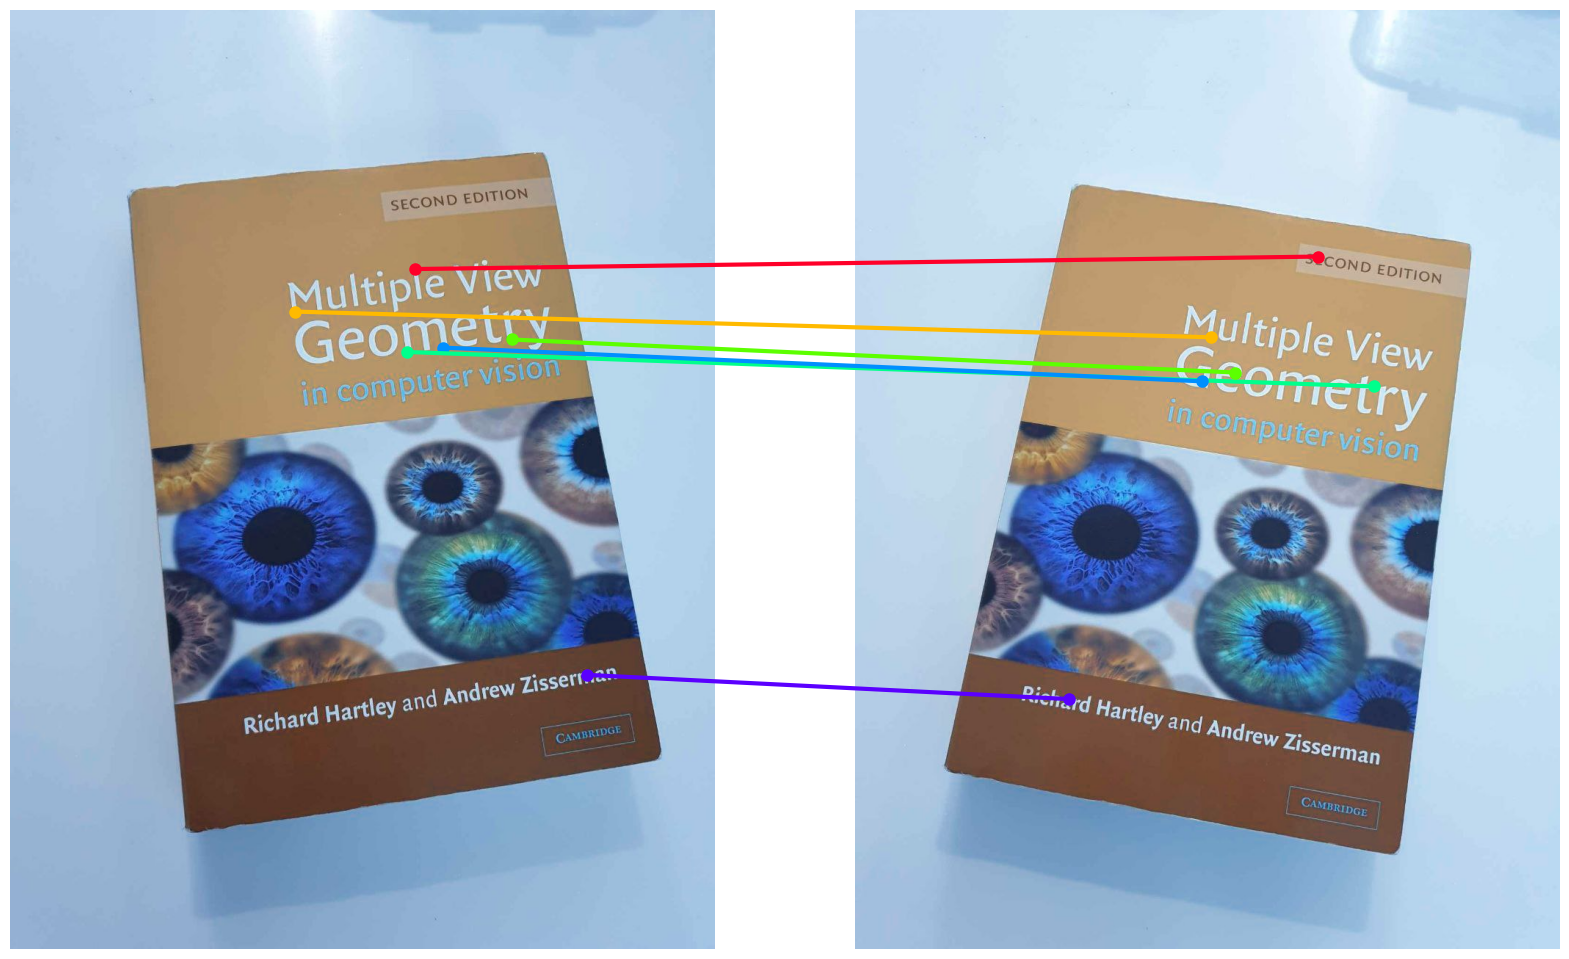

In [445]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img2.astype(np.uint8))
ax2.imshow(img1.astype(np.uint8))
i = 0
for reg in good_reg:
  xy1 = locs2[int(reg[0])].copy()
  xy2 = locs1[int(reg[1])].copy()
  tmp = xy1[0]
  xy1[0] = xy1[1]
  xy1[1] = tmp

  tmp = xy2[0]
  xy2[0] = xy2[1]
  xy2[1] = tmp
  rm = plt.get_cmap('gist_rainbow')
  color = rm(i/len(good_reg))
  con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",axesA=ax1, axesB=ax2, color=color, linewidth=3)
  ax2.add_artist(con)
  ax1.plot(xy1[0], xy1[1], 'ro', color=color, markersize=8)
  ax2.plot(xy2[0], xy2[1], 'ro', color=color, markersize=8)
  ax1.axis("off")
  ax2.axis("off")
  i+=1